# House Price Prediction

In this Notebook, I am working through the House price Prediction problem. In this problem our Dependent variable is continuous. The goal is to predict House price based on multiple feature. While working through this problem, I am following a framework I use to attack all my machine learning problems. It includes the following

steps:

1. Loading Dataset & Required libraries
2. Feature Engineering/ Data Preprocessing
3. Feature selection
4. Data Spliting
5. Model creation/ Model Validation

## 1. Loading Dataset & Required libraries

In [1]:
# at the top of the file, before other imports
import warnings

warnings.filterwarnings('ignore')

# no warnings will be printed from now on

In [2]:
#loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import statistics as st
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [3]:
#importing the dataset
df = pd.read_csv("D:/data science/exercise files/house price/Property_Price_Train.csv")
df

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FVR,62.0,7500,Paved,Paved,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RLD,62.0,7917,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RLD,85.0,13175,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RLD,66.0,9042,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
#data overview steps before data cleaning just ton understand data
df.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Construction_Year',
       'Remodel_Year', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Ha

In [5]:
df_desc = df.describe(include='all')
df_desc

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
count,1459.000000,1459.000000,1459,1200.000000,1459.000000,1459,91,1459,1459,1459,...,1459.000000,7,281,54,1459.000000,1459.000000,1459.000000,1459,1459,1459.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RLD,NaN,NaN,Paved,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1150,NaN,NaN,1453,50,924,1310,1458,...,NaN,3,157,49,NaN,NaN,NaN,1266,1197,NaN
mean,730.000000,56.922550,NaN,70.045833,10517.225497,NaN,NaN,NaN,NaN,NaN,...,2.760795,NaN,NaN,NaN,43.518849,6.322138,2007.815627,NaN,NaN,180944.102810
std,421.321334,42.304033,NaN,24.294456,9984.675721,NaN,NaN,NaN,NaN,NaN,...,40.191018,NaN,NaN,NaN,496.291826,2.704540,1.328542,NaN,NaN,79464.918335
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.500000,20.000000,NaN,59.000000,7549.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129950.000000
50%,730.000000,50.000000,NaN,69.000000,9477.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1094.500000,70.000000,NaN,80.000000,11603.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [6]:
#checking the shape of the data
df.shape

(1459, 81)

In [7]:
df.dtypes

Id                  int64
Building_Class      int64
Zoning_Class       object
Lot_Extent        float64
Lot_Size            int64
                   ...   
Month_Sold          int64
Year_Sold           int64
Sale_Type          object
Sale_Condition     object
Sale_Price          int64
Length: 81, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [9]:
#checking the variable type count in df
df.dtypes.value_counts()

object     43
int64      31
float64     7
dtype: int64

## 2. Feature Engineering/ Data Preprocessing

In [10]:
#getting the unique values columns
df["Id"].unique().shape
for val in df:
    print(val,"",df[val].unique().shape)

Id  (1459,)
Building_Class  (15,)
Zoning_Class  (5,)
Lot_Extent  (111,)
Lot_Size  (1073,)
Road_Type  (2,)
Lane_Type  (3,)
Property_Shape  (4,)
Land_Outline  (4,)
Utility_Type  (2,)
Lot_Configuration  (5,)
Property_Slope  (3,)
Neighborhood  (25,)
Condition1  (9,)
Condition2  (8,)
House_Type  (5,)
House_Design  (8,)
Overall_Material  (10,)
House_Condition  (9,)
Construction_Year  (112,)
Remodel_Year  (61,)
Roof_Design  (6,)
Roof_Quality  (8,)
Exterior1st  (15,)
Exterior2nd  (16,)
Brick_Veneer_Type  (5,)
Brick_Veneer_Area  (328,)
Exterior_Material  (4,)
Exterior_Condition  (5,)
Foundation_Type  (6,)
Basement_Height  (5,)
Basement_Condition  (5,)
Exposure_Level  (5,)
BsmtFinType1  (7,)
BsmtFinSF1  (636,)
BsmtFinType2  (7,)
BsmtFinSF2  (144,)
BsmtUnfSF  (779,)
Total_Basement_Area  (721,)
Heating_Type  (6,)
Heating_Quality  (5,)
Air_Conditioning  (2,)
Electrical_System  (6,)
First_Floor_Area  (752,)
Second_Floor_Area  (417,)
LowQualFinSF  (24,)
Grade_Living_Area  (860,)
Underground_Full_Bath

In [11]:
#dealing with unique or same value column
df.drop("Id",axis=1,inplace=True)

### Dealing with dates column
- if we subtract the construction_year column from current year it will be House_life
- After adding House_life column in data we removw the all dates and year column
  because it does not add any values in ML models

In [12]:
##dealing with dates column(if we subtract the construction_year column from current year it will be House_life)
df["House_life"] = 2020 - df["Construction_Year"]

In [13]:
df.shape

(1459, 81)

In [14]:
##Removing the date and year column 
df.drop("Construction_Year",axis=1,inplace=True)
df.drop("Remodel_Year",axis=1,inplace=True)
df.drop("Garage_Built_Year",axis=1,inplace=True)
df.drop("Month_Sold",axis=1,inplace=True)
df.drop("Year_Sold",axis=1,inplace=True)
df.shape

(1459, 76)

### Null values Analysis & Treatement on It

In [15]:
### Null Value analysis & treatment.
df.isnull().any()

Building_Class         False
Zoning_Class           False
Lot_Extent              True
Lot_Size               False
Road_Type              False
                       ...  
Miscellaneous_Value    False
Sale_Type              False
Sale_Condition         False
Sale_Price             False
House_life             False
Length: 76, dtype: bool

####  In decription of the dataset some feature has different naming for  NA values. So we replace these NA's with actual naming
###### NA - In this 14 variable NA has different naming
- Lane_Type = No_Allay_Access
- Basement_Height = No_Basement
- Basement_Condition = No_Basement
- Exposure_Level = No_Basement
- BsmtFinType1 = No_Basement
- BsmtFinType2 = No_Basement
- Fireplace_Quality = No_Fireplace
- Garage = No_Garage
- Garage_Finish_Year = No_Garage
- Garage_Qualit = No_Garage
- Garage_Condition = No_Garage
- Pool_Quality = No_Pool
- Fence_Quality = No_Fence
- Fence_Quality = None

In [16]:
df['Lane_Type'] = df['Lane_Type'].fillna('No_Allay_Access')
df['Basement_Height'] = df['Basement_Height'].fillna('No_Basement')
df['Basement_Condition'] = df['Basement_Condition'].fillna('No_Basement')
df['Exposure_Level'] = df['Exposure_Level'].fillna('No_Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No_Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No_Basement')
df['Fireplace_Quality'] = df['Fireplace_Quality'].fillna('No_Fireplace')
df['Garage'] = df['Garage'].fillna('No_Garage')
df['Garage_Finish_Year'] = df['Garage_Finish_Year'].fillna('No_Garage')
df['Garage_Quality'] = df['Garage_Quality'].fillna('No_Garage')
df['Garage_Condition'] = df['Garage_Condition'].fillna('No_Garage')
df['Garage'] = df['Garage'].fillna('No_Allay_Access')
df['Pool_Quality'] = df['Pool_Quality'].fillna('No_Pool')
df['Fence_Quality'] = df['Fence_Quality'].fillna('No_Fence')

In [17]:
# Dealing with NaN after replacing it with different naming.
df.isnull().any()

Building_Class         False
Zoning_Class           False
Lot_Extent              True
Lot_Size               False
Road_Type              False
                       ...  
Miscellaneous_Value    False
Sale_Type              False
Sale_Condition         False
Sale_Price             False
House_life             False
Length: 76, dtype: bool

In [18]:
df.isnull()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Sale_Type,Sale_Condition,Sale_Price,House_life
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

Building_Class           0
Zoning_Class             0
Lot_Extent             259
Lot_Size                 0
Road_Type                0
                      ... 
Miscellaneous_Value      0
Sale_Type                0
Sale_Condition           0
Sale_Price               0
House_life               0
Length: 76, dtype: int64

In [20]:
##checking percentage of nan values in column
for val in df:
   print(val, " ", (df[val].isnull().sum() / df.shape[0]) * 100)

Building_Class   0.0
Zoning_Class   0.0
Lot_Extent   17.751884852638796
Lot_Size   0.0
Road_Type   0.0
Lane_Type   0.0
Property_Shape   0.0
Land_Outline   0.0
Utility_Type   0.0
Lot_Configuration   0.0
Property_Slope   0.0
Neighborhood   0.0
Condition1   0.0
Condition2   0.0
House_Type   0.0
House_Design   0.0
Overall_Material   0.0
House_Condition   0.0
Roof_Design   0.0
Roof_Quality   0.0
Exterior1st   0.0
Exterior2nd   0.0
Brick_Veneer_Type   0.5483207676490748
Brick_Veneer_Area   0.5483207676490748
Exterior_Material   0.0
Exterior_Condition   0.0
Foundation_Type   0.0
Basement_Height   0.0
Basement_Condition   0.0
Exposure_Level   0.0
BsmtFinType1   0.0
BsmtFinSF1   0.0
BsmtFinType2   0.0
BsmtFinSF2   0.0
BsmtUnfSF   0.0
Total_Basement_Area   0.0
Heating_Type   0.0
Heating_Quality   0.0
Air_Conditioning   0.0
Electrical_System   0.06854009595613435
First_Floor_Area   0.0
Second_Floor_Area   0.0
LowQualFinSF   0.0
Grade_Living_Area   0.0
Underground_Full_Bathroom   0.0
Underground_H

In [21]:
#drop column having more than 75% nan
df.drop("Miscellaneous_Feature",axis=1,inplace=True)

In [22]:
# No of rows getting affctected by removing na's
no_of_rows = df[df.isna().sum(axis=1) >= 1].shape[0]
# % of rows getting affcted by removing Na's from column.
print((no_of_rows / df.shape[0]) * 100)

18.231665524331735


In [23]:
#  Imputation according to data type
def imputenull(data):
    for col in data.columns:
        if data[col].dtypes == 'int64' or data[col].dtypes == 'float64':
           data[col].fillna((data[col].mean()), inplace=True)
        else:
            data[col].fillna(data[col].value_counts().index[0], inplace=True)


imputenull(df)

In [24]:
# Now checking on the dataset after imputing the columns
df.isnull().sum()

Building_Class         0
Zoning_Class           0
Lot_Extent             0
Lot_Size               0
Road_Type              0
                      ..
Miscellaneous_Value    0
Sale_Type              0
Sale_Condition         0
Sale_Price             0
House_life             0
Length: 75, dtype: int64

### Converting Discrete Numerical column to Factor column.

  'Garage_Size','Fireplaces','Rooms_Above_Grade','Kitchen_Above_Grade',
'Bedroom_Above_Grade','Half_Bathroom_Above_Grade','Full_Bathroom_Above_Grade',
'Underground_Half_Bathroom','Underground_Full_Bathroom','House_Condition',
'Overall_Material','Building_Class'

In [25]:
###Converting Discrete Numerical column to Factor column

df["Garage_Size"] = df["Garage_Size"].astype("object")
df["Fireplaces"] = df["Fireplaces"].astype("object")
df["Rooms_Above_Grade"] = df["Rooms_Above_Grade"].astype("object")
df["Kitchen_Above_Grade"] = df["Kitchen_Above_Grade"].astype("object")
df["Bedroom_Above_Grade"] = df["Bedroom_Above_Grade"].astype("object")
df["Half_Bathroom_Above_Grade"] = df["Half_Bathroom_Above_Grade"].astype("object")
df["Full_Bathroom_Above_Grade"] = df["Full_Bathroom_Above_Grade"].astype("object")
df["Underground_Half_Bathroom"] = df["Underground_Half_Bathroom"].astype("object")
df["Underground_Full_Bathroom"] = df["Underground_Full_Bathroom"].astype("object")
df["House_Condition"] = df["House_Condition"].astype("object")
df["Overall_Material"] = df["Overall_Material"].astype("object")
df["Building_Class"] = df["Building_Class"].astype("object")
df.dtypes

Building_Class          object
Zoning_Class            object
Lot_Extent             float64
Lot_Size                 int64
Road_Type               object
                        ...   
Miscellaneous_Value      int64
Sale_Type               object
Sale_Condition          object
Sale_Price               int64
House_life               int64
Length: 75, dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   object 
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   int64  
 4   Road_Type                  1459 non-null   object 
 5   Lane_Type                  1459 non-null   object 
 6   Property_Shape             1459 non-null   object 
 7   Land_Outline               1459 non-null   object 
 8   Utility_Type               1459 non-null   object 
 9   Lot_Configuration          1459 non-null   object 
 10  Property_Slope             1459 non-null   object 
 11  Neighborhood               1459 non-null   object 
 12  Condition1                 1459 non-null   object 
 13  Condition2                 1459 non-null   objec

In [27]:
##checking dtypes_count
df.dtypes.value_counts()

object     54
int64      15
float64     6
dtype: int64

### Area column having negative values Replace it with zero because area can not be negative values

In [28]:
### Area column having negative values Replace it with zero

df['Garage_Area'] = df['Garage_Area'].clip(lower=0)
df['W_Deck_Area'] = df['W_Deck_Area'].clip(lower=0)
df['Open_Lobby_Area'] = df['Open_Lobby_Area'].clip(lower=0)
df['Enclosed_Lobby_Area'] = df['Enclosed_Lobby_Area'].clip(lower=0)

### Biased column's

In [29]:
# Checking the single value domination/biased
quasi_constant_feat = []
for feature in df.columns:
    dominant = (df[feature].value_counts() / np.float(len(df))).sort_values(ascending=False).values[0]
    if dominant > 0.95:
       quasi_constant_feat.append(feature)

print(quasi_constant_feat)

['Road_Type', 'Utility_Type', 'Condition2', 'Roof_Quality', 'Heating_Type', 'LowQualFinSF', 'Kitchen_Above_Grade', 'Three_Season_Lobby_Area', 'Pool_Area', 'Pool_Quality', 'Miscellaneous_Value']


In [30]:
# remove biased column

df.drop("Road_Type",axis=1,inplace=True)
df.drop("Utility_Type",axis=1,inplace=True)
df.drop("Condition2",axis=1,inplace=True)
df.drop("Roof_Quality",axis=1,inplace=True)
df.drop("Heating_Type",axis=1,inplace=True)
df.drop("LowQualFinSF",axis=1,inplace=True)
df.drop("Kitchen_Above_Grade",axis=1,inplace=True)
df.drop("Three_Season_Lobby_Area",axis=1,inplace=True)
df.drop("Pool_Area",axis=1,inplace=True)
df.drop("Pool_Quality",axis=1,inplace=True)
df.drop("Miscellaneous_Value",axis=1,inplace=True)
df.shape

(1459, 64)

### Target Varable analysis

In [31]:
## Renaming the Target variable
df.rename(columns={'Sale_Price':'tar_var'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   object 
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   int64  
 4   Lane_Type                  1459 non-null   object 
 5   Property_Shape             1459 non-null   object 
 6   Land_Outline               1459 non-null   object 
 7   Lot_Configuration          1459 non-null   object 
 8   Property_Slope             1459 non-null   object 
 9   Neighborhood               1459 non-null   object 
 10  Condition1                 1459 non-null   object 
 11  House_Type                 1459 non-null   object 
 12  House_Design               1459 non-null   object 
 13  Overall_Material           1459 non-null   objec

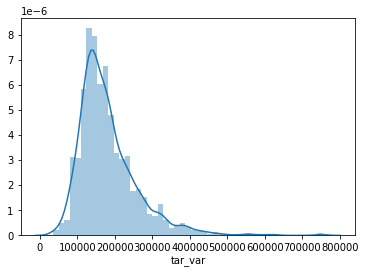

In [32]:
#Plotting histogram of target variable
tar_var = df['tar_var']
sns.distplot(tar_var);

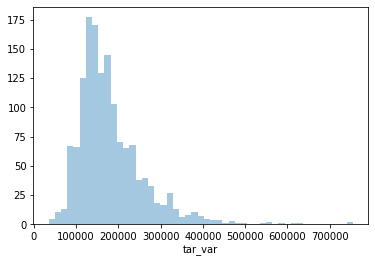

In [33]:
# Histograms : by removing density plot from top of it.
sns.distplot(tar_var, kde=False, rug=False);

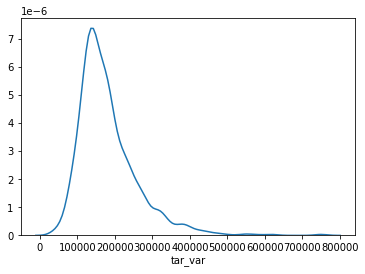

In [34]:
# Kernel density estimation :
sns.distplot(tar_var, hist=False, rug=False);

In [35]:
#Checking skewness
tar_var.skew()

1.8817600468196507

In [36]:
#Discover outliers with mathematical function

z = np.abs(stats.zscore(tar_var))
print(z)
threshold = 2.5
print(np.where(z > 2.5))
x= np.where(z > 2.5)

[0.34688698 0.0069979  0.53571424 ... 0.36576971 1.07701907 0.48867367]
(array([  53,   58,  112,  161,  178,  185,  224,  231,  278,  349,  378,
        389,  440,  473,  477,  496,  515,  527,  591,  661,  664,  688,
        691,  769,  774,  798,  803,  825,  898,  987, 1046, 1142, 1169,
       1181, 1182, 1243, 1268, 1353, 1373, 1437], dtype=int64),)


In [37]:
#no of outliers
no_of_outlier=  len(x[0])
no_of_outlier

40

In [38]:
df.iloc[np.where(z > 2.5)[:1]]

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Lane_Type,Property_Shape,Land_Outline,Lot_Configuration,Property_Slope,Neighborhood,...,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Screen_Lobby_Area,Fence_Quality,Sale_Type,Sale_Condition,tar_var,House_life
53,20,RLD,68.000000,50271,No_Allay_Access,IR1,Low,I,GS,Veenker,...,Y,134.075183,24.681074,0.000000,0,No_Fence,WD,Normal,385000,39
58,60,RLD,66.000000,13682,No_Allay_Access,IR2,HLS,CulDSac,GS,StoneBr,...,Y,143.546611,38.096634,0.000000,0,No_Fence,New,Partial,438780,14
112,60,RLD,77.000000,9965,No_Allay_Access,Reg,Lvl,I,GS,CollgCr,...,Y,0.000000,48.912222,27.953119,168,No_Fence,New,Partial,383970,13
161,60,RLD,110.000000,13688,No_Allay_Access,IR1,Lvl,I,GS,NridgHt,...,Y,220.765696,92.411046,51.864835,0,No_Fence,WD,Normal,412500,17
178,20,RLD,63.000000,17423,No_Allay_Access,IR1,Lvl,CulDSac,GS,StoneBr,...,Y,148.575176,0.000000,0.000000,0,No_Fence,New,Partial,501837,12
185,75,RMD,90.000000,22950,No_Allay_Access,IR2,Lvl,I,GS,OldTown,...,Y,192.300758,28.778159,28.453881,410,GdPrv,WD,Normal,475000,128
224,20,RLD,103.000000,13472,No_Allay_Access,Reg,Lvl,I,GS,NridgHt,...,Y,0.000000,13.280539,11.196911,0,No_Fence,WD,Normal,386250,17
231,60,RLD,174.000000,15138,No_Allay_Access,IR1,Lvl,I,GS,NoRidge,...,Y,213.288557,0.000000,49.979600,0,No_Fence,WD,Normal,403000,25
278,20,RLD,107.000000,14450,No_Allay_Access,Reg,Lvl,I,GS,NridgHt,...,Y,0.000000,43.918450,77.446294,142,No_Fence,New,Partial,415298,14
349,60,RLD,56.000000,20431,No_Allay_Access,IR2,Lvl,I,GS,NridgHt,...,Y,396.150118,0.000000,89.157196,0,No_Fence,New,Partial,437154,15


In [39]:
#remove outliers
df.drop(df.index[x[:1]], inplace=True)

In [40]:
df.tar_var.skew()

0.8327804574032142

### EDA- Exploratory data analysis

In [41]:
#segregate the data
df_num = df.select_dtypes(include=['int64','float64' ])
df_fac = df.select_dtypes(include=['object'])
df.dtypes

Building_Class     object
Zoning_Class       object
Lot_Extent        float64
Lot_Size            int64
Lane_Type          object
                   ...   
Fence_Quality      object
Sale_Type          object
Sale_Condition     object
tar_var             int64
House_life          int64
Length: 64, dtype: object

In [42]:
#skewness for all numric data
df_num.skew()

Lot_Extent              2.484795
Lot_Size               12.766429
Brick_Veneer_Area       2.670090
BsmtFinSF1              1.794845
BsmtFinSF2              4.229431
BsmtUnfSF               0.842861
Total_Basement_Area     1.562428
First_Floor_Area        1.383366
Second_Floor_Area       0.750883
Grade_Living_Area       1.219015
Garage_Area             0.082321
W_Deck_Area             0.750971
Open_Lobby_Area         0.693325
Enclosed_Lobby_Area     1.062258
Screen_Lobby_Area       4.162795
tar_var                 0.832780
House_life              0.585006
dtype: float64

In [43]:
#transformation
df_num["Lot_Extent"]= np.log(df_num["Lot_Extent"])
df_num["Lot_Size"]= np.log(df_num["Lot_Size"])
#df_num["Lot_Extent"] = df_num["Lot_Extent"] ** (1 / 3)
#df_num["Lot_Size"] = df_num["Lot_Size"] ** (1 / 3)
df_num["Brick_Veneer_Area"] = df_num["Brick_Veneer_Area"] ** (1 / 3)
df_num["BsmtFinSF2"] = df_num["BsmtFinSF2"] ** (1 / 3)
df_num["Screen_Lobby_Area"] = df_num["Screen_Lobby_Area"] ** (1 / 3)
df_num.skew()

Lot_Extent            -0.981051
Lot_Size              -0.177609
Brick_Veneer_Area      0.713337
BsmtFinSF1             1.794845
BsmtFinSF2             2.715075
BsmtUnfSF              0.842861
Total_Basement_Area    1.562428
First_Floor_Area       1.383366
Second_Floor_Area      0.750883
Grade_Living_Area      1.219015
Garage_Area            0.082321
W_Deck_Area            0.750971
Open_Lobby_Area        0.693325
Enclosed_Lobby_Area    1.062258
Screen_Lobby_Area      3.272239
tar_var                0.832780
House_life             0.585006
dtype: float64

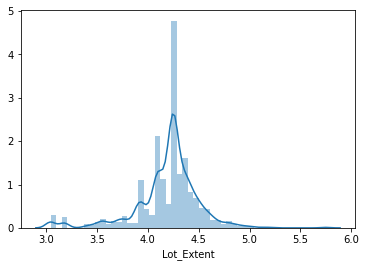

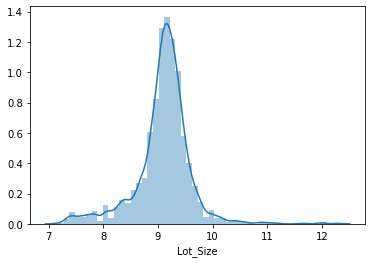

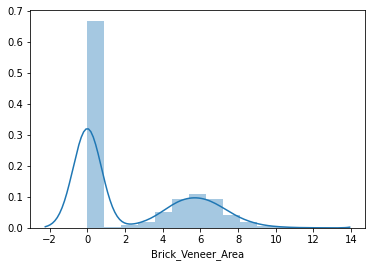

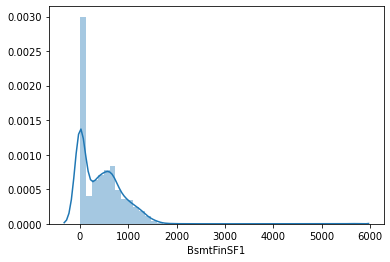

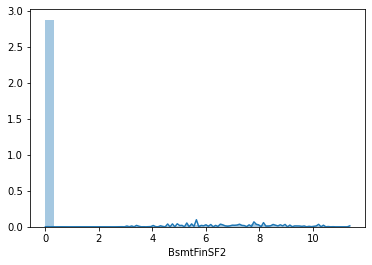

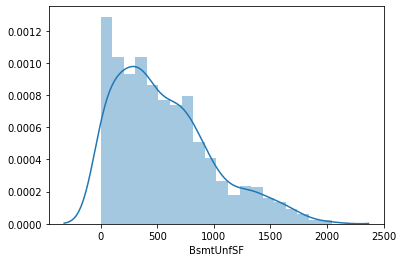

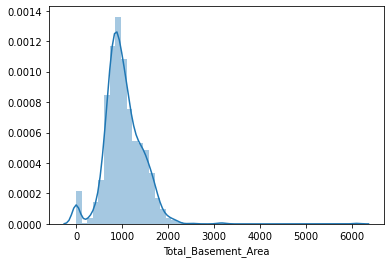

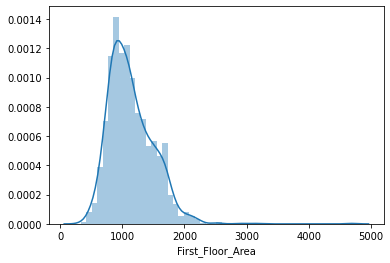

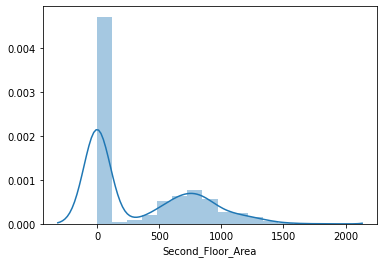

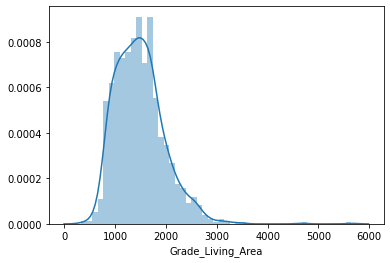

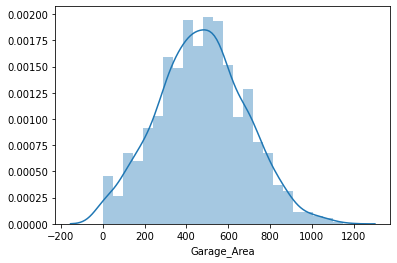

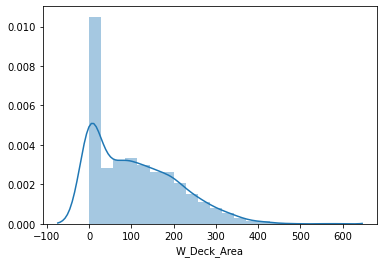

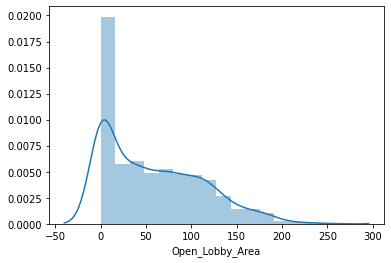

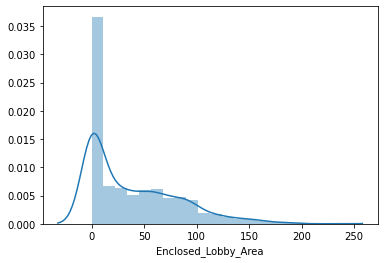

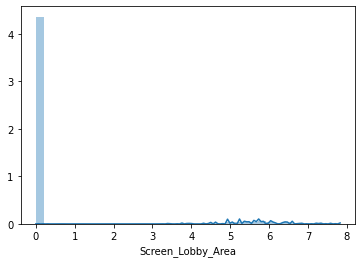

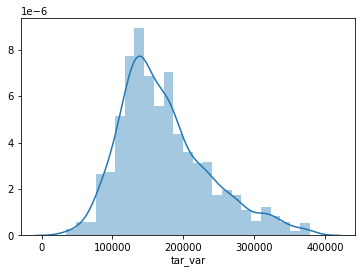

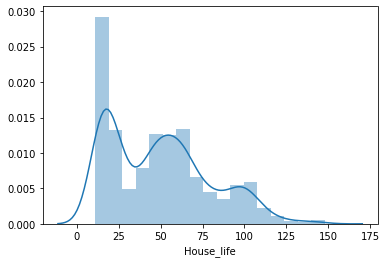

In [44]:
##plotting histogram for all numeric column
for i, col in enumerate(df_num.columns):
    plt.figure(i)
    sns.distplot(df_num[col])

In [45]:
df_fac.columns

Index(['Building_Class', 'Zoning_Class', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Roof_Design', 'Exterior1st', 'Exterior2nd',
       'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade', 'Kitchen_Quality',
       'Rooms_Above_Grade', 'Functional_Rate', 'Fireplaces',
       'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Size',
       'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Fence_Quality',
       'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [46]:
fac_feature= ['Building_Class', 'Zoning_Class', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Roof_Design', 'Exterior1st', 'Exterior2nd',
       'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade', 'Kitchen_Quality',
       'Rooms_Above_Grade', 'Functional_Rate', 'Fireplaces',
       'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Size',
       'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Fence_Quality',
       'Sale_Type', 'Sale_Condition']

In [47]:
list(enumerate(fac_feature))

[(0, 'Building_Class'),
 (1, 'Zoning_Class'),
 (2, 'Lane_Type'),
 (3, 'Property_Shape'),
 (4, 'Land_Outline'),
 (5, 'Lot_Configuration'),
 (6, 'Property_Slope'),
 (7, 'Neighborhood'),
 (8, 'Condition1'),
 (9, 'House_Type'),
 (10, 'House_Design'),
 (11, 'Overall_Material'),
 (12, 'House_Condition'),
 (13, 'Roof_Design'),
 (14, 'Exterior1st'),
 (15, 'Exterior2nd'),
 (16, 'Brick_Veneer_Type'),
 (17, 'Exterior_Material'),
 (18, 'Exterior_Condition'),
 (19, 'Foundation_Type'),
 (20, 'Basement_Height'),
 (21, 'Basement_Condition'),
 (22, 'Exposure_Level'),
 (23, 'BsmtFinType1'),
 (24, 'BsmtFinType2'),
 (25, 'Heating_Quality'),
 (26, 'Air_Conditioning'),
 (27, 'Electrical_System'),
 (28, 'Underground_Full_Bathroom'),
 (29, 'Underground_Half_Bathroom'),
 (30, 'Full_Bathroom_Above_Grade'),
 (31, 'Half_Bathroom_Above_Grade'),
 (32, 'Bedroom_Above_Grade'),
 (33, 'Kitchen_Quality'),
 (34, 'Rooms_Above_Grade'),
 (35, 'Functional_Rate'),
 (36, 'Fireplaces'),
 (37, 'Fireplace_Quality'),
 (38, 'Garage

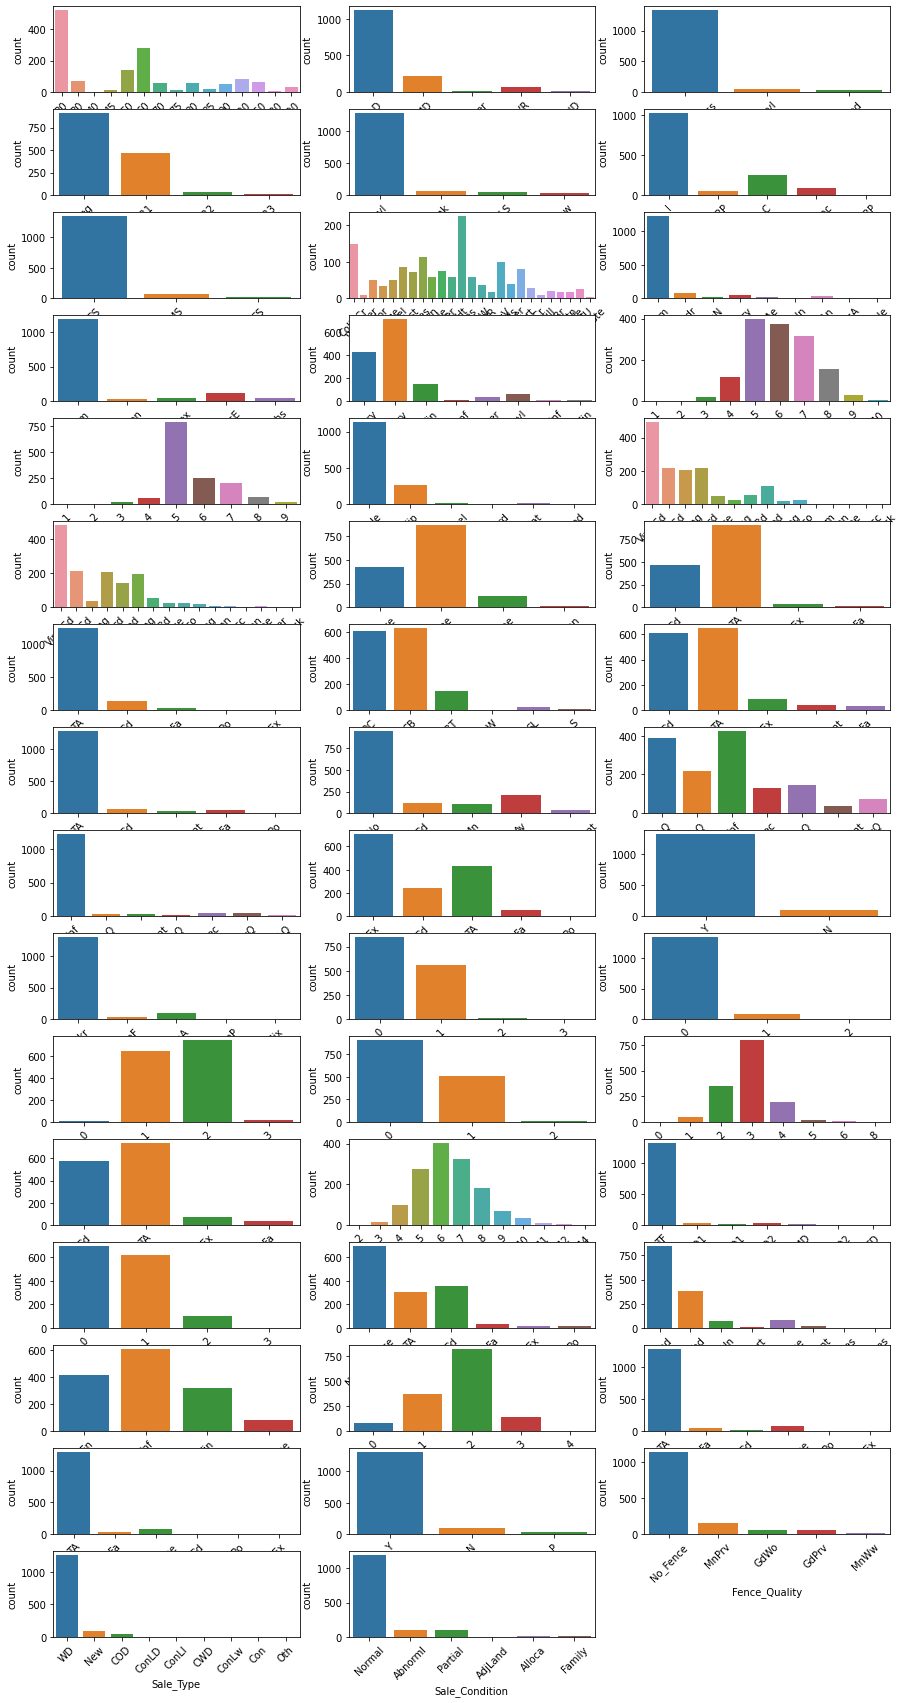

In [48]:
##Plotting barplot for all categorical columns
plt.figure(figsize= (15,30))
for i in enumerate(fac_feature):
    plt.subplot(16,3,i[0]+1)
    sns.countplot(i[1],data= df_fac)
    plt.xticks(rotation = 45)

## 3. Feature selection

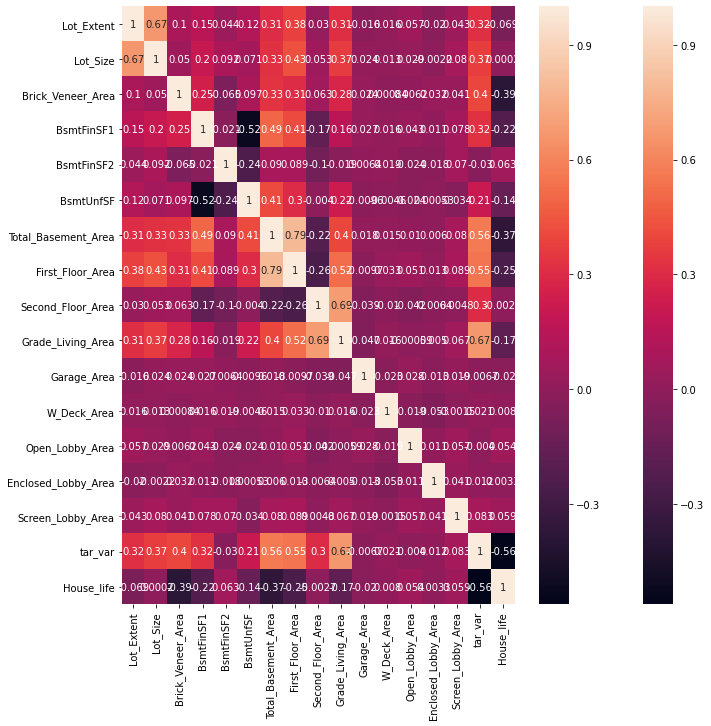

In [49]:
##Variable Significance
# Checking for co-relation
# corrplot
corrmat= df_num.corr()
fig,ax=plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)
sns.heatmap(corrmat,annot=True)

In [50]:
df.corr()

,Lot_Extent,Lot_Size,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Screen_Lobby_Area,tar_var,House_life
Lot_Extent,1.000000,0.315378,0.143911,0.204090,0.049005,0.104482,0.343874,0.402007,0.050953,0.348013,-0.026947,0.032409,0.052866,-0.023765,0.033492,0.309433,-0.098638
Lot_Size,0.315378,1.000000,0.067913,0.195007,0.115940,-0.002689,0.248735,0.290657,0.028673,0.241728,0.002382,0.024138,0.035028,0.009892,0.029863,0.248502,-0.000958
Brick_Veneer_Area,0.143911,0.067913,1.000000,0.234447,-0.066319,0.078870,0.303752,0.273264,0.129145,0.310007,0.025112,0.018104,0.001939,0.019994,0.073285,0.376233,-0.295423
BsmtFinSF1,0.204090,0.195007,0.234447,1.000000,-0.051358,-0.518042,0.494530,0.410913,-0.165189,0.157260,0.027154,0.015753,0.042596,0.010764,0.073386,0.323175,-0.222701
BsmtFinSF2,0.049005,0.115940,-0.066319,-0.051358,1.000000,-0.213033,0.117207,0.113470,-0.096314,0.002485,-0.002445,0.007618,-0.023940,-0.015051,0.088889,0.005501,0.045965
BsmtUnfSF,0.104482,-0.002689,0.078870,-0.518042,-0.213033,1.000000,0.413440,0.302997,-0.003989,0.224906,-0.009640,-0.004643,-0.024236,0.000527,-0.026783,0.210009,-0.142505
Total_Basement_Area,0.343874,0.248735,0.303752,0.494530,0.117207,0.413440,1.000000,0.794918,-0.216497,0.401865,0.017637,0.014784,0.010232,0.005985,0.084520,0.562659,-0.365821
First_Floor_Area,0.402007,0.290657,0.273264,0.410913,0.113470,0.302997,0.794918,1.000000,-0.255301,0.522578,-0.009743,0.033421,0.051015,0.013327,0.089191,0.545792,-0.250982
Second_Floor_Area,0.050953,0.028673,0.129145,-0.165189,-0.096314,-0.003989,-0.216497,-0.255301,1.000000,0.685641,-0.039156,-0.010259,-0.041925,-0.006369,0.020025,0.302227,-0.002737
Grade_Living_Area,0.348013,0.241728,0.310007,0.157260,0.002485,0.224906,0.401865,0.522578,0.685641,1.000000,-0.046648,0.015892,-0.000593,0.005026,0.080985,0.665294,-0.173320


In [51]:
# Which are the columns that should removed/highly correlated
def checkcorrelation(dataset, threshold):
    col_corr = set()
    cor_matrix = dataset.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i, j]) > threshold:
                colname = cor_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

checkcorrelation(df_num, 0.8)

set()

In [52]:
# Combining Fact and Numeric data

New_df = pd.concat([df_num,df_fac], axis=1)
New_df.columns

Index(['Lot_Extent', 'Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area',
       'Second_Floor_Area', 'Grade_Living_Area', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Screen_Lobby_Area',
       'tar_var', 'House_life', 'Building_Class', 'Zoning_Class', 'Lane_Type',
       'Property_Shape', 'Land_Outline', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Roof_Design', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Quality', 'Air_Conditioning', 'Electrical_System',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade

## 4. Data Splitting

In [53]:
# spliting tar_var from New_df
tar_var = New_df['tar_var']
New_df.drop("tar_var", axis=1, inplace=True)

In [54]:
# Converting in dummies
df = pd.get_dummies(New_df, drop_first=False)

In [55]:
df.dtypes

Lot_Extent                float64
Lot_Size                  float64
Brick_Veneer_Area         float64
BsmtFinSF1                  int64
BsmtFinSF2                float64
                           ...   
Sale_Condition_AdjLand      uint8
Sale_Condition_Alloca       uint8
Sale_Condition_Family       uint8
Sale_Condition_Normal       uint8
Sale_Condition_Partial      uint8
Length: 325, dtype: object

In [56]:
#Spliting now.
x_train,x_test,y_train,y_test = train_test_split(df, tar_var, random_state = 10,test_size = 0.3)

In [57]:
x_train.shape

(993, 325)

In [58]:
x_test.shape

(426, 325)

In [59]:
y_train.shape

(993,)

In [60]:
y_test.shape

(426,)

## 5. Model creation & Model Validation

### 1. Linear Regression

In [61]:
# Implementing model
from sklearn import linear_model as lm
model = lm.LinearRegression()
result = model.fit(x_train, y_train)

In [62]:
model.coef_

array([-3.92819096e+03,  1.53664449e+04, -4.05232156e+02, -2.70150586e+01,
       -3.64320728e+03, -3.33565690e+01,  3.31940059e+01, -6.25676595e+00,
        1.46693206e+01,  4.71259167e+01, -2.89980237e+00,  2.82422772e+00,
        1.36774201e+01,  3.75047788e+01,  5.52668210e+02, -1.96863196e+02,
        9.29882371e+03,  8.31874212e+03, -1.68312155e+03,  2.47975430e+04,
       -5.31933530e+03, -3.64335741e+03,  8.22736055e+03,  3.32413457e+03,
        3.19835875e+03, -1.59599147e+03, -2.73054091e+03,  7.66277422e+03,
       -1.23808071e+04,  5.89865721e+03, -4.33732404e+04, -4.94376138e+04,
        3.44709816e+04, -2.09614117e+01,  1.32144277e+04,  1.77316584e+03,
       -1.82776146e+03,  2.01487311e+03, -1.87111649e+02, -4.93815726e+01,
        6.88896218e+02, -4.16916106e+03,  3.52964642e+03, -5.83567526e+03,
        4.32953092e+03, -2.53878503e+03,  4.04492937e+03,  5.40991906e+03,
        1.30851145e+04,  9.01830130e+02, -2.33418959e+04,  3.94503219e+03,
        7.25504928e+03,  

In [63]:
#Printing the coefficient
print(model.intercept_)

-72254.113996323


In [64]:
# predicting the values.
predictions = model.predict(x_test)

In [65]:
score= model.score(x_train, y_train)   ## Rsquare value
linear_R2= score*100
linear_R2

92.92273494807174

In [66]:
# Getting the model eveluation from predicted values
from sklearn import metrics

In [67]:
# model evaluation
linear_mse = metrics.mean_squared_error(y_test, predictions)
linear_mse

590144381.7583051

In [68]:
linear_RMSE= np.sqrt(linear_mse)
linear_RMSE

24292.887472639086

In [69]:
linear_mae= metrics.mean_absolute_error(y_test, predictions)
linear_mae

16739.801531575107

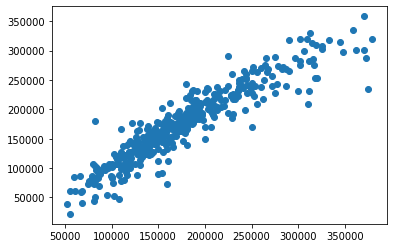

In [70]:
## Plotting the Residuals
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(y_test, predictions)

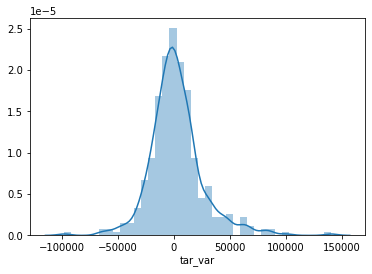

In [71]:
sns.distplot(y_test - predictions)

### 2. Lass Regression

In [72]:
##Lasso
from sklearn.linear_model import Lasso
lm_lasso= Lasso()

In [73]:
lm_lasso.fit(x_train,y_train)

Lasso()

In [74]:
lm_lasso.coef_

array([-3.79444460e+03,  1.52143226e+04, -3.85253350e+02, -1.77589948e+01,
       -2.07680875e+03, -2.39016563e+01,  2.36481465e+01, -4.92755993e+00,
        1.55917072e+01,  4.59306657e+01, -2.83596283e+00,  3.02498302e+00,
        1.37496035e+01,  3.67601018e+01,  5.56817616e+02, -1.97161872e+02,
        6.91985253e+03,  5.87315572e+03, -3.33311264e+03,  1.96720739e+04,
       -7.34778805e+03, -5.87518877e+03,  5.92453968e+03,  1.98138834e+03,
        0.00000000e+00, -3.64941822e+03, -2.22430262e+03,  3.98784494e+03,
       -1.57668881e+04,  1.72972859e+03, -4.08156811e+04, -4.97157128e+04,
        3.24321340e+04, -1.93744216e+03,  1.12841351e+04, -0.00000000e+00,
       -1.65882692e+03,  2.07897721e+03,  0.00000000e+00, -5.74814684e+02,
        5.49642583e-01, -4.46057174e+03,  2.89640039e+03, -9.62551181e+03,
        3.37902552e+02, -6.31760989e+03,  2.34658533e+02,  1.48233671e+03,
        9.21429291e+03, -2.94323309e+03, -2.67966370e+04, -0.00000000e+00,
        0.00000000e+00,  

In [75]:
#r2 value
lasso_R2=np.round(lm_lasso.score(x_test, y_test)*100,2)
lasso_R2

86.53

In [76]:
#prediction
predict_lm_lasso = lm_lasso.predict(x_test)

In [77]:
#MSE
from sklearn import metrics
lasso_mse=np.round(metrics.mean_squared_error(y_test,predict_lm_lasso),2)
lasso_mse

578619165.4

In [78]:
lasso_RMSE= np.sqrt(lasso_mse)
lasso_RMSE

24054.504056413218

In [79]:
lasso_mae= metrics.mean_absolute_error(y_test, predict_lm_lasso)
lasso_mae

16625.204300407207

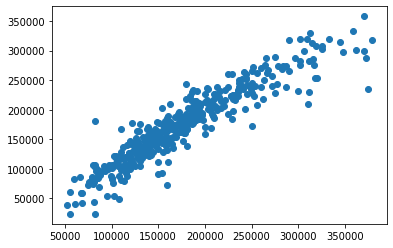

In [80]:
## plotting the residuals
plt.scatter(y_test, predict_lm_lasso)

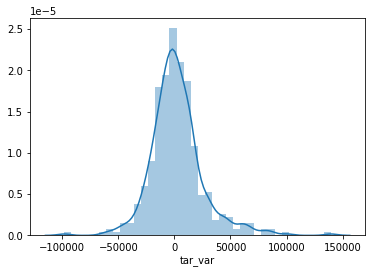

In [81]:
sns.distplot(y_test - predict_lm_lasso)

### 3. Ridge Regression

In [82]:
##Ridge
from sklearn.linear_model import Ridge
lm_ridge= Ridge()

In [83]:
lm_ridge.fit(x_train,y_train)

Ridge()

In [84]:
#r2 value
ridge_R2=np.round(lm_ridge.score(x_test, y_test)*100,2)
ridge_R2

87.82

In [85]:
#prediction
predict_lm_ridge = lm_ridge.predict(x_test)

In [86]:
#MSE
from sklearn import metrics
ridge_mse=np.round(metrics.mean_squared_error(y_test,predict_lm_ridge),2)
ridge_mse

522856514.32

In [87]:
ridge_RMSE= np.sqrt(ridge_mse)
ridge_RMSE

22866.05594150421

In [88]:
ridge_mae= metrics.mean_absolute_error(y_test, predict_lm_ridge)
ridge_mae

16114.598790222379

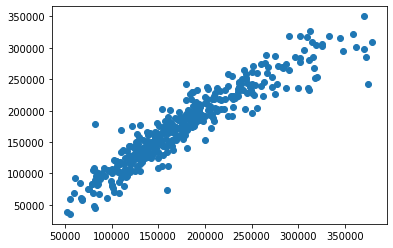

In [89]:
## plotting the residuals
plt.scatter(y_test, predict_lm_ridge)

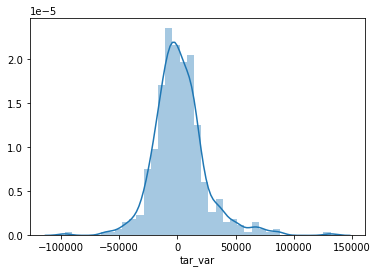

In [90]:
sns.distplot(y_test - predict_lm_ridge)

### 4. Elastic Net

In [93]:
##Elastic_net
from sklearn.linear_model import ElasticNet
lm_elasticnet= ElasticNet()

In [94]:
lm_elasticnet.fit(x_train,y_train)

ElasticNet()

In [95]:
#r2 value
elasticnet_R2= np.round(lm_elasticnet.score(x_test, y_test)*100,2)
elasticnet_R2

83.62

In [96]:
#prediction
predict_lm_elasticnet = lm_elasticnet.predict(x_test)

In [97]:
#MSE
from sklearn import metrics
elasticnet_mse=np.round(metrics.mean_squared_error(y_test,predict_lm_elasticnet),2)
elasticnet_mse

703431940.26

In [98]:
elasticnet_RMSE= np.sqrt(elasticnet_mse)
elasticnet_RMSE

26522.291384041462

In [99]:
elasticnet_mae= metrics.mean_absolute_error(y_test, predict_lm_elasticnet)
elasticnet_mae

18248.183516938345

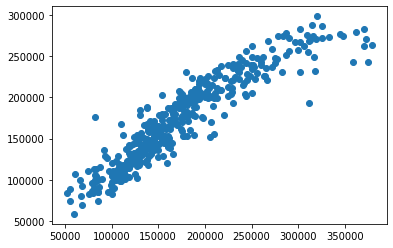

In [100]:
## plotting the residuals
plt.scatter(y_test, predict_lm_elasticnet)

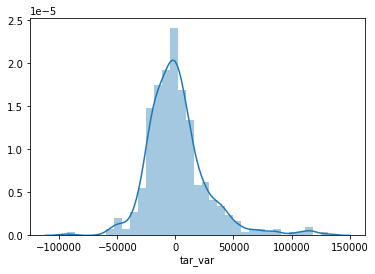

In [101]:
sns.distplot(y_test - predict_lm_elasticnet)

## Comparision of applied Model Results

In [102]:
##All results 

Results = { 'R2' : [linear_R2,lasso_R2,ridge_R2,elasticnet_R2],
            'mse' : [linear_mse,lasso_mse,ridge_mse,elasticnet_mse],
            'RMSE' : [linear_RMSE,lasso_RMSE,ridge_RMSE,elasticnet_RMSE],
            'mae' : [linear_mae,lasso_mae,ridge_mae,elasticnet_mae]
          }

Result_matrix = pd.DataFrame(Results, columns = ['R2','mse','RMSE','mae'], index=['Linear','Lasso','Ridge','Elasticnet'])
print(Result_matrix)

                   R2           mse          RMSE           mae
Linear      92.922735  5.901444e+08  24292.887473  16739.801532
Lasso       86.530000  5.786192e+08  24054.504056  16625.204300
Ridge       87.820000  5.228565e+08  22866.055942  16114.598790
Elasticnet  83.620000  7.034319e+08  26522.291384  18248.183517


## Conclusion
- After comparing all four model results I can see Ridge Regression is working better.
- Ridge Regression is giving better Acuuracy and lower RMSE & mae Values compare to other three Models.